<a href="https://colab.research.google.com/github/Lee-Gunju/AI-paper-code-review-for-personal-project/blob/master/%5B%EB%AC%B8%EC%A0%9C%5D_LSTM%EC%9D%84_%ED%99%9C%EC%9A%A9%ED%95%B4_%EC%A3%BC%EA%B0%80_%EC%98%88%EC%B8%A1_%EB%AA%A8%EB%8D%B8_%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : LSTM을 활용해 주가 예측 모델 구현하기

이번 튜토리얼 에서는 다음과 같은 **프로세스 파이프라인**으로 주가 예측을 진행합니다.

- FinanceDataReader를 활용하여 주가 데이터 받아오기
- TensorFlow Dataset 클래스를 활용하여 주가 데이터 구축
- LSTM 을 활용한 주가 예측 모델 구축

## Step 1. 데이터 불러오기 및 EDA

### 문제 01. 필요한 모듈 import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

### 문제 02. FinanceDataReader import

**FinanceDataReader**는 주가 데이터를 편리하게 가져올 수 있는 파이썬 패키지입니다.

- [GitHub Repo](https://github.com/FinanceData/FinanceDataReader)

**FinanceDataReader**가 아직 설치 되지 않으신 분들은 아래의 주석을 해제한 후 명령어로 설치해 주시기 바랍니다.

In [ ]:
!pip install finance-datareader

In [ ]:
import FinanceDataReader as fdr

### 문제 03. 삼성전자 데이터 불러오기

In [ ]:
# fdr 라이브러리를 활용해 삼성전자 주가 데이터를 불러오세요.
# 대상 : 삼성전자(005930) 전체 (1996-11-05 ~ 현재)
samsung = fdr.DataReader('005930')

매우 편리하게 삼성전자 주가 데이터를 `DataFrame`형식으로 받아옵니다.

기본 **오름차순 정렬**이 된 데이터임을 알 수 있습니다.

### 컬럼 설명

- `Open`:   시가
- `High`:   고가
- `Low`:    저가
- `Close`:  종가
- `Volume`: 거래량
- `Change`: 대비

### 문제 04. 삼성전자 데이터 EDA

In [ ]:
samsung

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1997-07-01,1259,1286,1259,1269,167900,NaN
1997-07-02,1277,1313,1277,1296,169940,0.021277
1997-07-03,1295,1304,1283,1290,108460,-0.004630
1997-07-04,1295,1304,1286,1296,101780,0.004651
1997-07-05,1286,1301,1286,1287,56160,-0.006944
...,...,...,...,...,...,...
2021-07-01,80500,80600,80000,80100,13382882,-0.007435
2021-07-02,80000,80400,79900,80000,8753097,-0.001248
2021-07-05,80100,80800,80000,80400,8330969,0.005000


**미국 주식 데이터**도 가져올 수 있습니다.

### 문제 05. 애플 데이터 불러오기

In [ ]:
# Apple(AAPL), 애플
apple = fdr.DataReader('AAPL')

### 문제 06. 애플 데이터 EDA

In [ ]:
apple.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2021-06-29,136.33,134.82,136.49,134.38,64560000.0,0.0115
2021-06-30,136.96,136.13,137.38,135.89,63260000.0,0.0046
2021-07-01,137.27,136.68,137.30,135.77,52490000.0,0.0023
2021-07-02,139.96,137.90,140.00,137.74,78950000.0,0.0196
2021-07-06,142.02,140.17,143.11,140.15,108180000.0,0.0147


### 문제 07. 특정 시점(2017년) 이후 데이터 불러오기

In [ ]:
# Apple(AAPL), 2017년
apple = fdr.DataReader('AAPL', '2017')

In [ ]:
apple.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2017-01-03,29.04,28.95,29.08,28.69,115130000.0,0.0031
2017-01-04,29.00,28.96,29.13,28.94,84470000.0,-0.0014
2017-01-05,29.15,28.98,29.22,28.95,88770000.0,0.0052
2017-01-06,29.48,29.20,29.54,29.12,127010000.0,0.0113
2017-01-09,29.75,29.49,29.86,29.48,134250000.0,0.0092


### 문제 08. 날짜를 지정하여 특정 범위(40년간) 데이터 불러오기

In [ ]:
# Ford(F), 1980-01-01 ~ 2019-12-30 (40년 데이터)
ford = fdr.DataReader('F', '1980-01-01', '2019-12-30')

In [ ]:
ford.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
1980-03-18,1.83,1.83,1.85,1.82,3770000.0,-0.0108
1980-03-19,1.85,1.85,1.86,1.83,1560000.0,0.0109
1980-03-20,1.86,1.86,1.88,1.85,1450000.0,0.0054
1980-03-21,1.78,1.78,1.85,1.76,5020000.0,-0.0430
1980-03-24,1.71,1.71,1.75,1.66,3330000.0,-0.0393


### 문제 09. '금'과 '달러' 데이터도 가져올 수 있습니다. 두 데이터를 불러와 head를 출력해보세요.

*[GitHub 페이지 링크](https://github.com/FinanceData/FinanceDataReader) 참고

In [ ]:
gold = fdr.DataReader('ZG') # 금 선물 (ICE)
gold.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
1980-01-02,575.5,562.5,577.0,558.0,7260.0,0.0785
1980-01-03,625.0,627.0,640.0,603.0,20750.0,0.0860
1980-01-04,603.6,609.5,621.0,573.0,2660.0,-0.0342
1980-01-07,627.0,629.0,635.0,611.0,3000.0,0.0388
1980-01-08,602.5,611.5,619.0,600.0,750.0,-0.0391


In [ ]:
# 달러 가격
usdkrw = fdr.DataReader('USD/KRW', '1995-01-01') 
usdkrw.head()

,Close,Open,High,Low,Change
Date,,,,,
1995-01-02,788.50,788.50,788.50,788.50,0.0000
1995-01-03,788.65,788.05,788.85,787.55,0.0002
1995-01-04,789.95,788.65,790.05,788.45,0.0016
1995-01-05,789.90,789.80,790.20,789.30,-0.0001
1995-01-06,791.55,789.75,791.65,789.65,0.0021


### 문제 10. 삼성전자 데이터를 STOCK_CODE에 저장하고 인덱스를 확인해보세요

In [ ]:
# 삼성전자 주식코드: 005930
STOCK_CODE = '005930'

In [ ]:
# fdr 라이브러리를 활용해 삼성전자 데이터를 불러오세요 
stock = fdr.DataReader(STOCK_CODE)

In [ ]:
stock.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-07-01,80500,80600,80000,80100,13382882,-0.007435
2021-07-02,80000,80400,79900,80000,8753097,-0.001248
2021-07-05,80100,80800,80000,80400,8330969,0.005000
2021-07-06,80600,81200,80500,81200,12131651,0.009950
2021-07-07,81200,81300,80300,80700,10984309,-0.006158


In [ ]:
# 인덱스를 확인해보세요.
stock.index

DatetimeIndex(['1997-07-01', '1997-07-02', '1997-07-03', '1997-07-04',
               '1997-07-05', '1997-07-07', '1997-07-08', '1997-07-09',
               '1997-07-10', '1997-07-11',
               ...
               '2021-06-24', '2021-06-25', '2021-06-28', '2021-06-29',
               '2021-06-30', '2021-07-01', '2021-07-02', '2021-07-05',
               '2021-07-06', '2021-07-07'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

In [ ]:
# 인덱스를 확인해보세요.


## Step 2. 시계열 데이터 시각화


### 문제 11. 인덱스가 `DatetimeIndex`로 정의되어 있다면, 연도, 월, 일을 쪼갤 수 있습니다. 데이터를 분리해주세요.

In [ ]:
stock['Year'] = stock.index.year
stock['Month'] = stock.index.month
stock['Day'] = stock.index.day

In [ ]:
stock.head()

,Open,High,Low,Close,Volume,Change,Year,Month,Day
Date,,,,,,,,,
1997-07-01,1259,1286,1259,1269,167900,NaN,1997,7,1
1997-07-02,1277,1313,1277,1296,169940,0.021277,1997,7,2
1997-07-03,1295,1304,1283,1290,108460,-0.004630,1997,7,3
1997-07-04,1295,1304,1286,1296,101780,0.004651,1997,7,4
1997-07-05,1286,1301,1286,1287,56160,-0.006944,1997,7,5


### 문제 12. 연도별, 월별 피봇테이블을 각각 구현해보세요.

In [ ]:
stock.groupby(['Year', 'Month']).mean()

Open          High  ...    Change        Day
Year Month                              ...                     
1997 7       1228.769231   1241.461538  ... -0.003517  15.884615
     8       1261.840000   1278.040000  ...  0.003438  15.840000
     9       1224.652174   1238.739130  ... -0.002450  15.086957
     10      1027.230769   1045.730769  ... -0.020538  16.576923
     11       796.280000    817.440000  ...  0.005632  15.400000
...                  ...           ...  ...       ...        ...
2021 3      82250.000000  82763.636364  ... -0.000570  16.318182
     4      83786.363636  84150.000000  ...  0.000101  16.045455
     5      80547.368421  81105.263158  ... -0.000592  16.684211
     6      81195.454545  81590.909091  ...  0.000147  15.318182
     7      80480.000000  80860.000000  ...  0.000022   4.200000

[289 rows x 7 columns]

### 문제 13. matplotlib을 활용해 시간에 따른 주식 가격 시계열 그래프를 그려보세요.

Text(0, 0.5, 'price')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


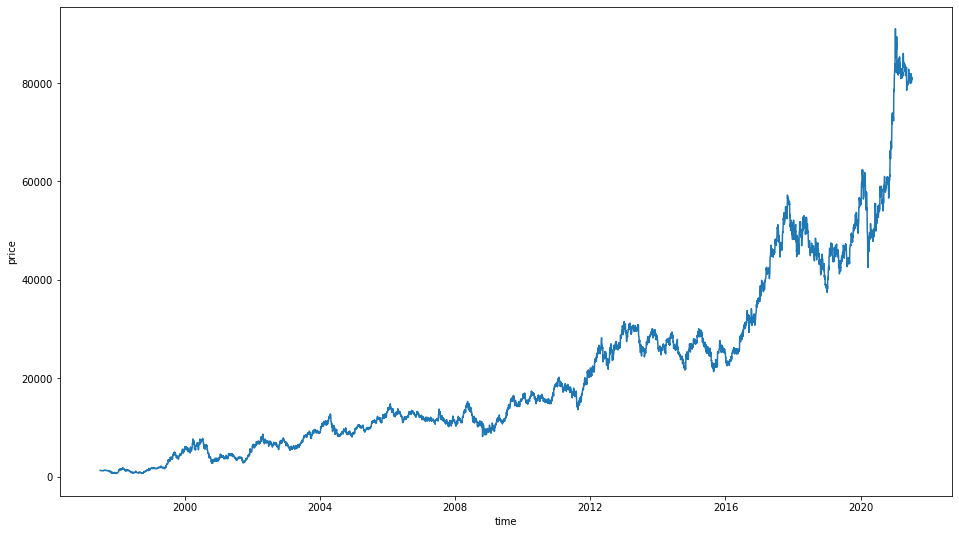

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

### 문제 14. subplots를 활용해 그래프 4개(2,2)를 동시에 그려보세요.

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


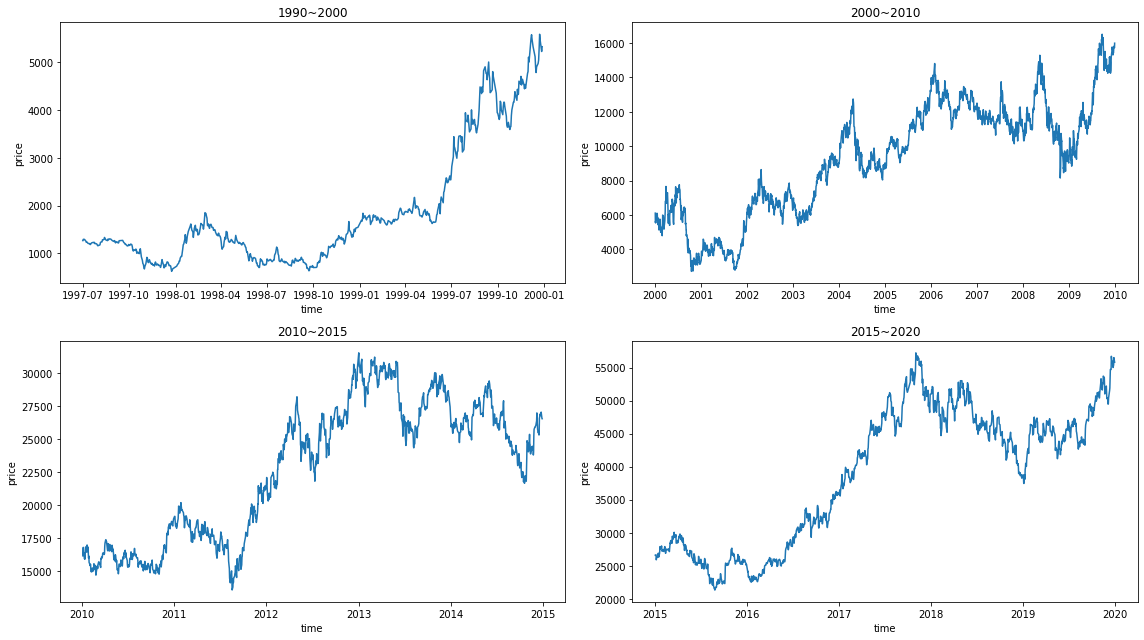

In [ ]:
# 1990~2000, 2000~2010, 2010~2015, 2015~2020
time_steps = [['1990', '2000'], 
              ['2000', '2010'], 
              ['2010', '2015'], 
              ['2015', '2020']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

## Step 3. 시계열 데이터의 전처리

### 문제 15. MinMaxScaler를 활요해 데이터 전처리를 수행합니다.

주가 데이터에 대하여 딥러닝 모델이 더 잘 학습할 수 있도록 **정규화(Normalization)**를 해주도록 하겠습니다.

**표준화 (Standardization)**와 **정규화(Normalization)**에 대한 내용은 아래 링크에서 더 자세히 다루니, 참고해 보시기 바랍니다.

- [데이터 전처리에 관하여](https://teddylee777.github.io/scikit-learn/scikit-learn-preprocessing)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
# 스케일 후 columns
scaled = scaler.fit_transform(stock[scale_cols])
scaled

array([[0.01394241, 0.01328512, 0.01406704, 0.00710389, 0.00185923],
       [0.01414175, 0.01356405, 0.01426816, 0.00740265, 0.00188182],
       [0.01434109, 0.01347107, 0.0143352 , 0.00733626, 0.00120103],
       ...,
       [0.88704319, 0.83471074, 0.89385475, 0.88270833, 0.09225248],
       [0.89258029, 0.83884298, 0.89944134, 0.89156053, 0.13433911],
       [0.89922481, 0.83987603, 0.8972067 , 0.88602791, 0.12163408]])

스케일이 완료된 column으로 새로운 데이터프레임을 생성합니다.

**시간 순으로 정렬**되어 있으며, datetime index는 제외했습니다.

*6,000개의 row, 5개 column*으로 이루어진 데이터셋이 DataFrame으로 정리되었습니다.

In [ ]:
# 아래 코드는 그대로 실행해주세요.
df = pd.DataFrame(scaled, columns=scale_cols)

In [ ]:
df

,Open,High,Low,Close,Volume
0,0.013942,0.013285,0.014067,0.007104,0.001859
1,0.014142,0.013564,0.014268,0.007403,0.001882
2,0.014341,0.013471,0.014335,0.007336,0.001201
3,0.014341,0.013471,0.014369,0.007403,0.001127
4,0.014241,0.013440,0.014369,0.007303,0.000622
...,...,...,...,...,...
5995,0.891473,0.832645,0.893855,0.879389,0.148195
5996,0.885936,0.830579,0.892737,0.878282,0.096927
5997,0.887043,0.834711,0.893855,0.882708,0.092252
5998,0.892580,0.838843,0.899441,0.891561,0.134339


### 문제 16. 모델 학습을 위해 train 데이터와 test 데이터로 분할해주세요.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Close 컬럼이 예측할 데이터입니다.
# test_size는 0.2, random_state는 0으로 지정해주세요.
# shuffle을 수행하지 않습니다.
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close', 1), df['Close'], test_size=0.2, random_state=0, shuffle=False)

### 문제 17. train 데이터와 test 데이터의 shape을 각각 살펴봅니다.

In [ ]:
x_train.shape, y_train.shape

((4800, 4), (4800,))

In [ ]:
x_test.shape, y_test.shape

((1200, 4), (1200,))

In [ ]:
x_train

,Open,High,Low,Volume
0,0.013942,0.013285,0.014067,0.001859
1,0.014142,0.013564,0.014268,0.001882
2,0.014341,0.013471,0.014335,0.001201
3,0.014341,0.013471,0.014369,0.001127
4,0.014241,0.013440,0.014369,0.000622
...,...,...,...,...
4795,0.341307,0.322107,0.341006,0.002333
4796,0.345293,0.324380,0.345028,0.002320
4797,0.342193,0.325620,0.345251,0.002401
4798,0.347508,0.324370,0.346592,0.001649


### 문제 18. TensroFlow Dataset을 활용해 시퀀스 데이터셋을 함수로 구현해주세요

In [ ]:
import tensorflow as tf

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

## Step 4. 모델 구현하기

In [ ]:
y_train.shape

(4800,)

### 문제 19. Hyperparameter를 정의하고 데이터에 적용해주세요.

In [ ]:
# 아래 코드는 그대로 실행해주세요.
WINDOW_SIZE=20
BATCH_SIZE=32

In [ ]:
# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
# WINDOW_SIZE와 BATCH_SIZE를 각 데이터셋에 적용해주세요.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [ ]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다. 그대로 실행해보고, 데이터의 shape을 살펴보세요.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


In [ ]:
a, b = next(iter(train_data))
a[0]

<tf.Tensor: shape=(20, 1), dtype=float64, numpy=
array([[0.06166665],
       [0.06244122],
       [0.06454361],
       [0.061556  ],
       [0.06188795],
       [0.0638797 ],
       [0.06310513],
       [0.06188795],
       [0.05978556],
       [0.05358901],
       [0.05436358],
       [0.05215053],
       [0.05004813],
       [0.05004813],
       [0.04606464],
       [0.04706052],
       [0.04517942],
       [0.04119593],
       [0.03699114],
       [0.03909353]])>

### 문제 20. Sequential 모델을 구현합니다. 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성합니다. filters는 32로, kernel_size는 5로 지정해주세요.
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM과 Dense 레이러를 사용해주세요. 활성함수는 각각 tanh와 relu로 지정합니다.
    LSTM(16, activation='relu'),
    Dense(16, activation="relu"),
    Dense(1),
])

### 문제 21. 모델을 Compile합니다. loss는 Huber 함수를 사용하고 optimizer는 Adam을 사용해주세요.

In [ ]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [ ]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 20, 32)            192       
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 3,617
Trainable params: 3,617
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# callbacks로 앞에서 구현한 earlystopping과 checkpoint를 지정해주세요.
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
150/150 [==============================] - 6s 38ms/step - loss: 1.9810e-05 - mse: 3.9621e-05 - val_loss: 0.1601 - val_mse: 0.4217

Epoch 00001: val_loss did not improve from 0.07670
Epoch 2/50
150/150 [==============================] - 6s 37ms/step - loss: 1.8192e-05 - mse: 3.6385e-05 - val_loss: 0.2275 - val_mse: 0.7024

Epoch 00002: val_loss did not improve from 0.07670
Epoch 3/50
150/150 [==============================] - 6s 36ms/step - loss: 1.8651e-05 - mse: 3.7302e-05 - val_loss: 0.2708 - val_mse: 0.9058

Epoch 00003: val_loss did not improve from 0.07670
Epoch 4/50
150/150 [==============================] - 5s 36ms/step - loss: 1.6346e-05 - mse: 3.2692e-05 - val_loss: 0.3222 - val_mse: 1.1888

Epoch 00004: val_loss did not improve from 0.07670
Epoch 5/50
150/150 [==============================] - 6s 37ms/step - loss: 1.6470e-05 - mse: 3.2939e-05 - val_loss: 0.2972 - val_mse: 1.0541

Epoch 00005: val_loss did not improve from 0.07670
Epoch 6/50
150/150 [===============

## Step 5. 모델을 활용한 예측 및 결과 시각화

### 문제 24. 저장한 ModelCheckpoint 를 불러옵니다.

In [ ]:
model.load_weights(filename)

### 문제 25. `test_data`를 활용하여 예측을 수행합니다.

In [ ]:
pred = model.predict(test_data)

In [ ]:
pred.shape

(1180, 1)

### 문제 26. matplotlib을 활용해 예측 데이터를 시각화해주세요.

아래 시각화 코드중 y_test 데이터에 **[20:]**으로 슬라이싱을 한 이유는

예측 데이터에서 20일치의 데이터로 21일치를 예측해야하기 때문에 test_data로 예측 시 *앞의 20일은 예측하지 않습니다.*

따라서, 20번 째 index와 비교하면 더욱 정확합니다.

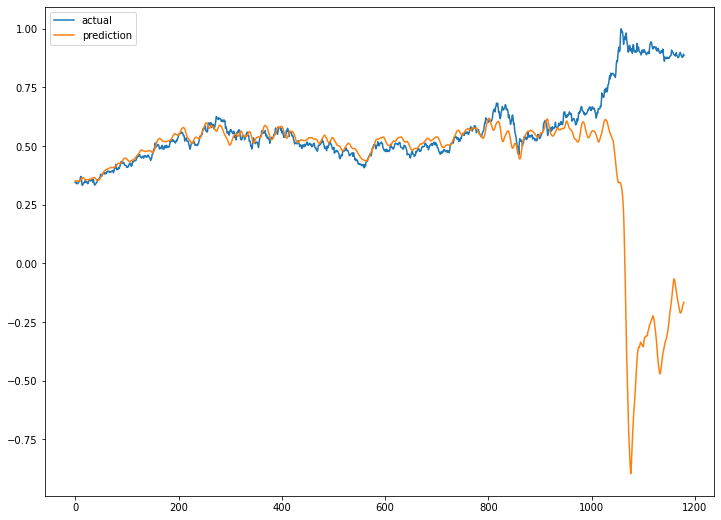

In [ ]:
# 20일치의 데이터로 21일치를 예측하므로 test_data 사용시 이전 20일은 예측하지 않습니다.
# 따라서 y_test 데이터에 [20:]로 슬라이싱해주세요.
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()